# **Lab 2**


### Question:
#### Write a python program to simulate a neural network model for calculating the error function and its surface.


### Solution:

#### Import and Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.data')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


#### Data Pre-Processing

We will convert the output lable from class name to numerical value, e.g. 

`Iris-setosa -> 0`,
 
`Iris-versicolor -> 1` and so on.

In [3]:
def target_converter(Lable):
    # To change class lable into numerial variable
    A = []
    output = []
    x = 0
    # Append value if not present in A
    for i in Lable:
        if (i not in A):
            A.append(i)
            x += 1
    # Increase Count If Present in A
    for i in Lable:
        x = A.index(i)
        output.append(x)
        
    return(np.array(output))

In [4]:
X = np.array(df)[:,0:4]
X[:5]

array([[4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]], dtype=object)

In [5]:
Y = np.array(df)[:,4]
Y = target_converter(Y)
Y[:5]

array([0, 0, 0, 0, 0])

#### Transfer Function and Error

In [6]:
# Sigmoid(Log Sigmoidal) transfer function
def sigmoid(n):
    return 1/(1+np.exp(-n))

# Misclassification Error
def error(val,tar):
    if val == tar:
        return 0
    
    else:
        return 1

#### Neural Network Architecture
As iris have 4 input layers and 3 output layers we will use $3X4$ matrix to represent the weight. We will use log-sigmoidal function as transfer function , because it outputs the value between 0 and 1. We will use these values as probabilities to determine the output of the perticular pattern. At last we will use classification error as 0 when output is right, otherwise 1.

The Neural Network Representation is as follows:

![](NuralNet _iris.png)

In [16]:
def neuron(x,y,epoch):

    tot_err = []
    # Loop through n(Epoch) number of times
    for _ in range(epoch):
        # Error List for each Epoch
        err_list = []

        for i,j in zip(x,y):
            # For each iteration actual output list
            ao_list = []

            # Rangdomly Generated Weight
            w = np.random.rand(3,4)
            net = np.dot(i,w.T)

            # Actual output List for each iteration
            for n in net:
                ao = sigmoid(n)
                ao_list.append(ao)

            # Taking the maximum probality among the outputs
            out = ao_list.index(max(ao_list))

            err = error(out,j)
            err_list.append(err)

        tot_err.append(err_list)

    # X and Y axis for plotting
    ax = plt.axes(projection = '3d')
    x_axis = np.arange(1,len(y) + 1,step = 1)
    y_axis = np.arange(1,epoch + 1,step = 1)
    # Using Meshgrid for generating 2D Matrices of X and Y axis
    X_Axis, Y_Axis = np.meshgrid(x_axis,y_axis)
    z_axis = np.array(tot_err)
    
    # Plotting 3D Scatter Plot
    ax.scatter3D(X_Axis,Y_Axis,z_axis, c = z_axis)
    ax.set_xlabel('Pattern')
    ax.set_ylabel('Epoch')
    ax.set_zlabel('Error')
    plt.title('Misclassification Error')
    plt.show()

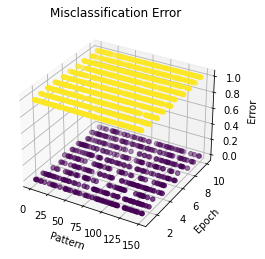

In [17]:
neuron(X,Y,10)

#### RMS Error:

The misclassification error demonstrates what patterns the randomly generated weights can classify successfully and which are failed. But we can't get much information out of that. If we want to know to which extent an error is been generated we have to consider some continuous error functions like Root Mean Square error on the multiclass target and actual output.

In [9]:
def multiClassConverter(target):
    # Converting Targets to Multiclass Labels (0 -> [1, 0, 0], 1 -> [0, 1, 0] etc.) 
    val = list(set(target))
    val.sort()
    out_dict = {}
    n = len(val)
    # Creating dictionary object by using keys as targets and values as Multiclass Labels 
    for i in range(n):
        l = [0] * n
        l[i] = 1
        out_dict[val[i]] = l
    return out_dict

T = multiClassConverter(Y)
T

{0: [1, 0, 0], 1: [0, 1, 0], 2: [0, 0, 1]}

In [14]:
from functools import reduce


def neuron_rms(x,y,epoch):

    tot_err = []
    # Loop through n(Epoch) number of times
    for _ in range(epoch):
        # Error List for each Epoch
        err_list = []

        for i,j in zip(x,y):
            # For each iteration actual output list
            ao_list = []

            # Rangdomly Generated Weight
            w = np.random.rand(3,4)
            net = np.dot(i,w.T)

            # Actual output List for each iteration
            for n in net:
                ao = sigmoid(n)
                ao_list.append(ao)

            # Using Multiclass Converter to convert targets into multiclass numeriacl labels
            T = multiClassConverter(Y)
            tar = T[j]
            error_array = np.array(tar) - np.array(ao_list)

            # Root Mean Square Error
            err = np.sqrt(reduce(lambda x,y: (x**2 + y**2)/2 ,error_array))

            err_list.append(err)

        tot_err.append(err_list)

    # X and Y axis for plotting
    ax = plt.axes(projection = '3d')
    x_axis = np.arange(1,len(y) + 1,step = 1)
    y_axis = np.arange(1,epoch + 1,step = 1)
    # Using Meshgrid for generating 2D Matrices of X and Y axis
    X_Axis, Y_Axis = np.meshgrid(x_axis,y_axis)
    z_axis = np.array(tot_err)
    
    # Plotting 3D Scatter Plot
    ax.scatter3D(X_Axis,Y_Axis,z_axis, c = z_axis)
    ax.set_xlabel('Pattern')
    ax.set_ylabel('Epoch')
    ax.set_zlabel('Error')
    plt.title('Root Mean Square Error')
    plt.show()

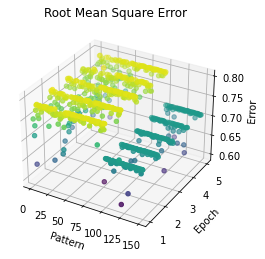

In [15]:
neuron_rms(X,Y,5)